In [36]:
import torch
import astra
import numpy as np
import matplotlib.pyplot as plt
from deeprecon.torch.utils.phantom import phantom

In [37]:
vol_geom = astra.create_vol_geom(256, 256, 10)
angles = np.linspace(0, np.pi * 2, 256, False)
proj_geom = astra.create_proj_geom('cone', 2.0, 2.0, 10, 256, angles, 500, 500)
x = phantom(n=(256, 256, 10), dim=3)
x = x.transpose(2, 0, 1)
proj_id, p = astra.create_sino3d_gpu(x, proj_geom, vol_geom)
rec_id = astra.data3d.create('-vol', vol_geom)

cfg = astra.astra_dict('BP3D_CUDA')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = proj_id
alg_id = astra.algorithm.create(cfg)
astra.algorithm.run(alg_id, 1)
b = astra.data3d.get(rec_id)


cfg = astra.astra_dict('FDK_CUDA')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = proj_id
alg_id = astra.algorithm.create(cfg)
astra.algorithm.run(alg_id, 1)
recon = astra.data3d.get(rec_id)

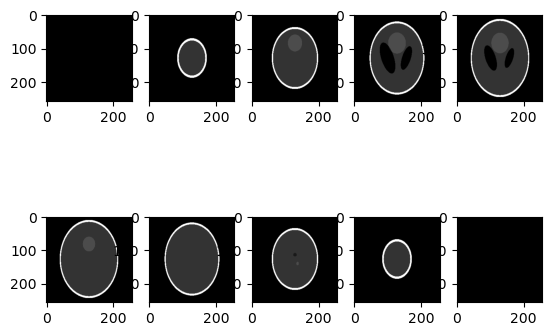

In [38]:
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i].squeeze(), cmap="gray")
plt.show()

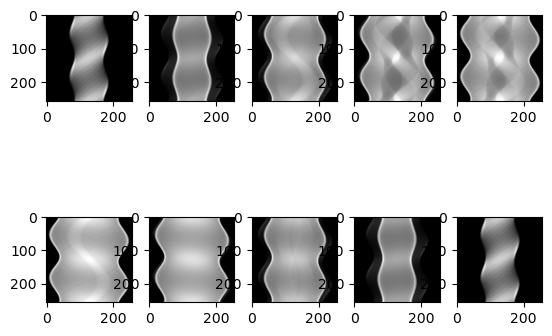

In [39]:
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(p[i].squeeze(), cmap="gray")
plt.show()


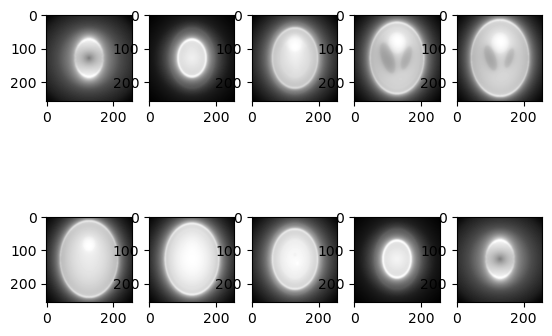

In [40]:
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(b[i].squeeze(), cmap="gray")
plt.show()

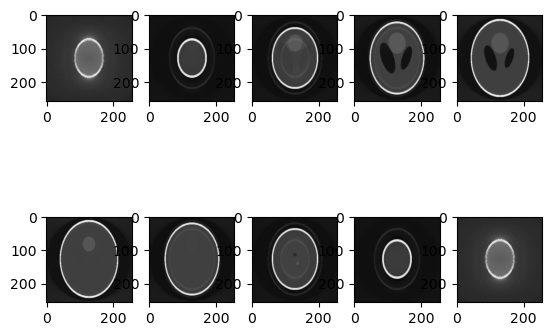

In [41]:
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(recon[i].squeeze(), cmap="gray")
plt.show()